## Import Libraries

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [54]:
boston  = pd.read_csv('housing.csv')


In [55]:
print('Shape of data:', boston.shape)

Shape of data: (506, 14)


In [56]:
print('Feature names:',boston.columns)

Feature names: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [58]:
boston.Price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [59]:
df=boston

## Q2: Print the head rows of the dataframe.

In [60]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

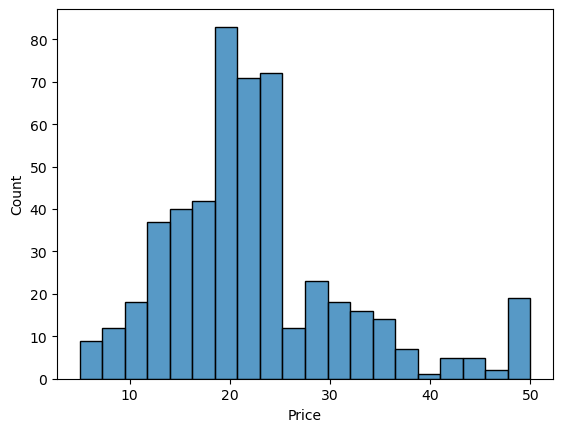

In [61]:
sns.histplot(df['Price'], bins=20);

## Q4: Use a heatmap to show the correlation between features and the target labels.

In [62]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


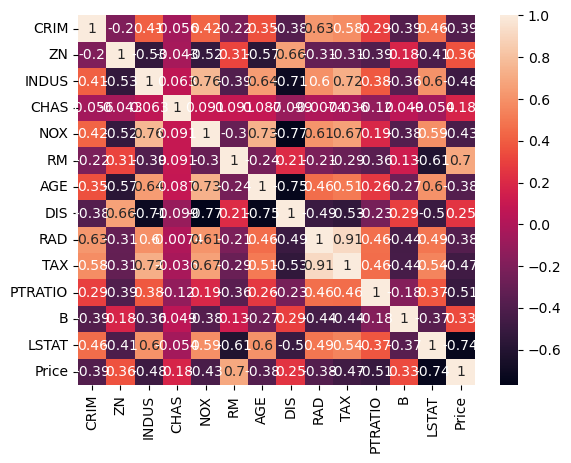

In [63]:
sns.heatmap(df.corr(), annot=True);

## Q5: Use a lmplot to draw the relations between price and LSTAT.

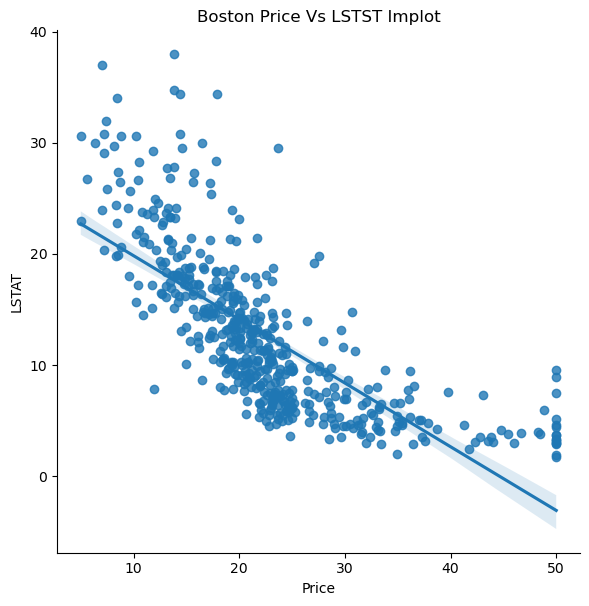

In [64]:
plot = df
bar_plot = sns.lmplot (x = 'Price', y = 'LSTAT', data = plot, height = 6)
ax = plt.gca ()
ax.set_title ("Boston Price Vs LSTST Implot")
plt.show ()

## Q6: Use a lmplot to draw the relations between price and RM.

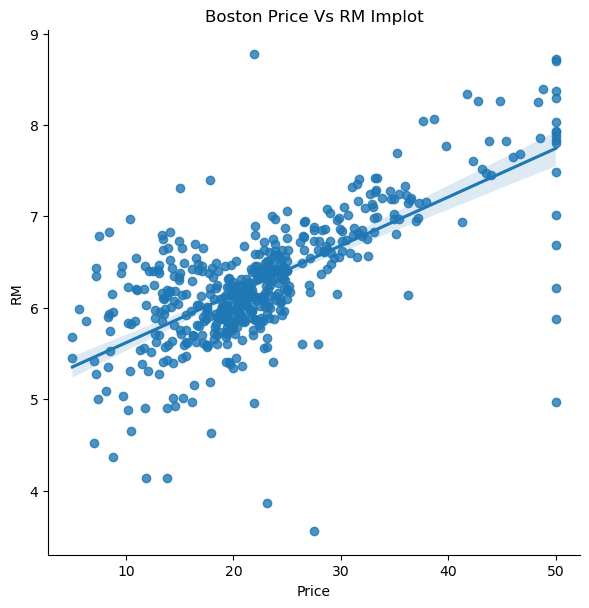

In [65]:
plot = df
bar_plot = sns.lmplot (x = 'Price', y = 'RM', data = plot, height = 6)
ax = plt.gca ()
ax.set_title ("Boston Price Vs RM Implot")
plt.show ()

In [66]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [69]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [71]:
lm = LinearRegression()

## Q9: Train the Model.

In [72]:
lm.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [73]:
print(lm.intercept_) 

27.789606703251074


In [74]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.093418
ZN,0.043303
INDUS,-0.022522
CHAS,3.342047
NOX,-16.330196
RM,4.271930
AGE,0.000721
DIS,-1.403231
RAD,0.255429
TAX,-0.007482


In [75]:
predictions = lm.predict(X_test)


In [76]:
Real_Values = np.array(y_test)


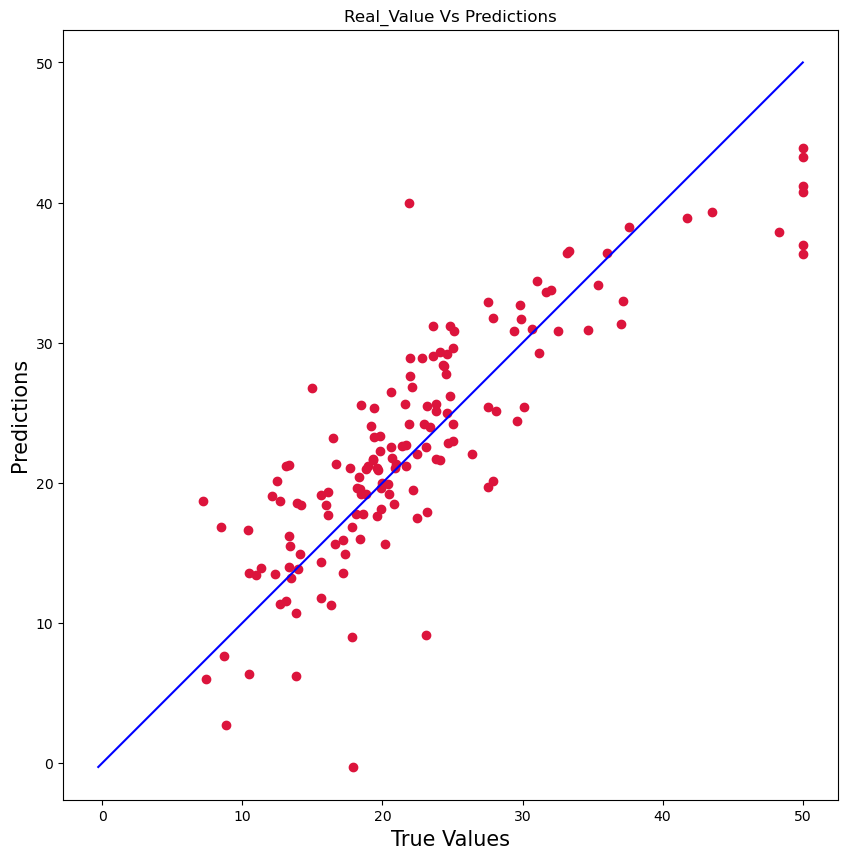

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(Real_Values, predictions, c='crimson')

p1 = max(max(predictions), max(Real_Values))
p2 = min(min(predictions), min(Real_Values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Real_Value Vs Predictions')
plt.show()

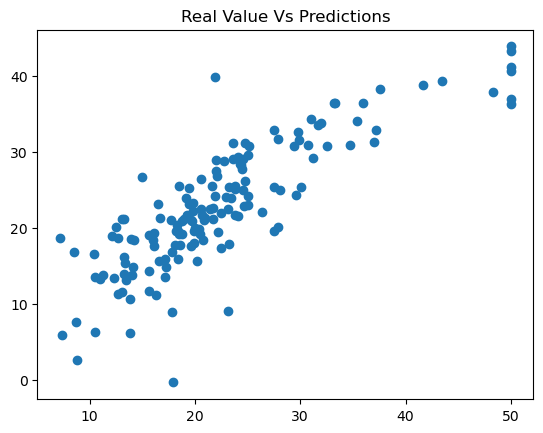

In [78]:
plt.scatter(Real_Values,predictions); 
ax = plt.gca ()
ax.set_title ("Real Value Vs Predictions")
plt.show ()

## Residual Histogram

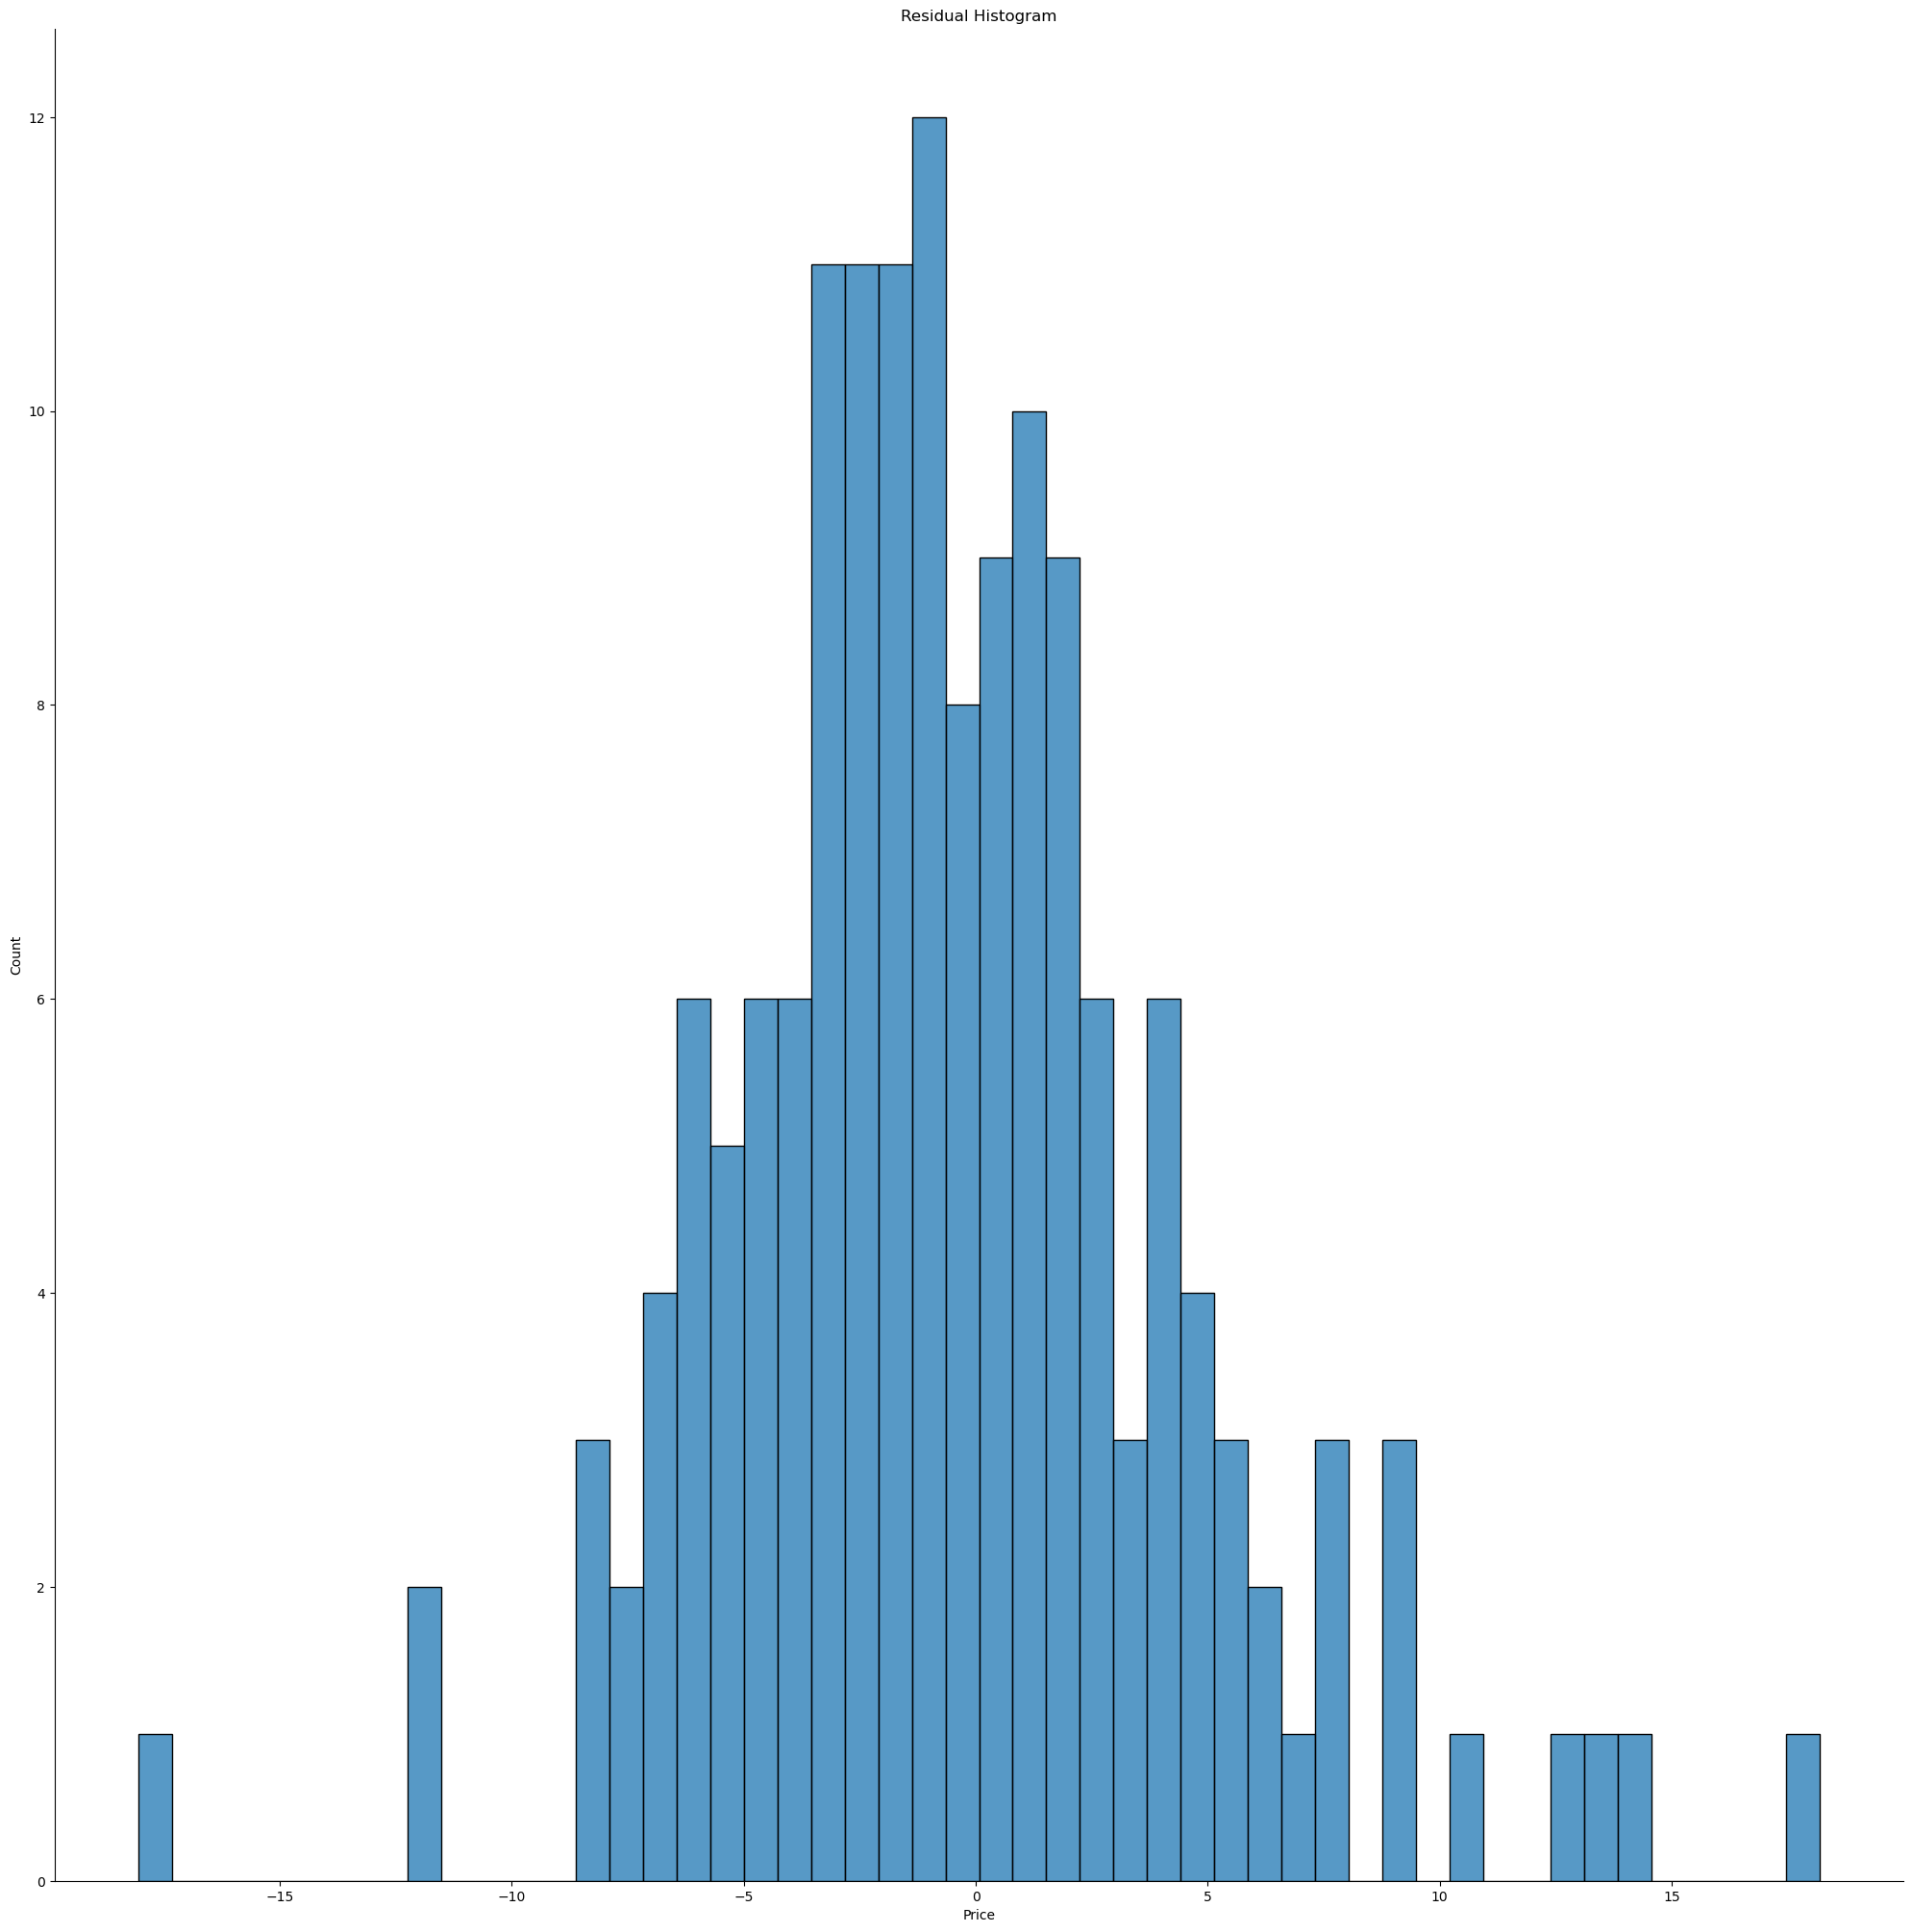

In [79]:
sns.displot((y_test-predictions),bins=50, height=20); 
ax = plt.gca ()
ax.set_title ("Residual Histogram")
plt.show ()

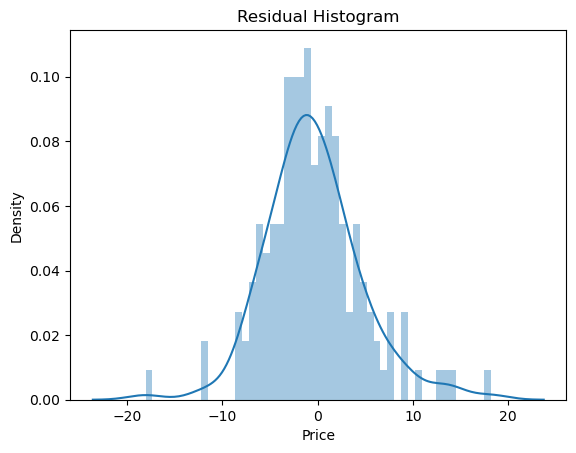

In [80]:
sns.distplot((y_test-predictions),bins=50);
ax = plt.gca ()
ax.set_title ("Residual Histogram")
plt.show ()

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(2))
print('R^2:', metrics.r2_score(y_test, predictions).round(2))

MAE: 3.78
RMSE: 5.04
R^2: 0.69
